In [7]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, nltk, warnings
import matplotlib as mpl
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings('ignore')

In [8]:
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries',
                    'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

In [9]:
def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

In [10]:
credits = load_tmdb_credits("tmdb_5000_credits.csv")
movies = load_tmdb_movies("tmdb_5000_movies.csv")

In [11]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'id': 65731, 'order': 0, 'character': 'Jake ...","[{'id': 1721, 'job': 'Editor', 'department': '..."
1,285,Pirates of the Caribbean: At World's End,"[{'id': 85, 'order': 0, 'character': 'Captain ...","[{'id': 120, 'job': 'Director of Photography',..."
2,206647,Spectre,"[{'id': 8784, 'order': 0, 'character': 'James ...","[{'id': 153, 'job': 'Original Music Composer',..."
3,49026,The Dark Knight Rises,"[{'id': 3894, 'order': 0, 'character': 'Bruce ...","[{'id': 947, 'job': 'Original Music Composer',..."
4,49529,John Carter,"[{'id': 60900, 'order': 0, 'character': 'John ...","[{'id': 7, 'job': 'Screenplay', 'department': ..."


In [12]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'id': 289, 'name': 'Ingenious Film Partners'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'id': 2, 'name': 'Walt Disney Pictures'}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'id': 5, 'name': 'Columbia Pictures'}, {'id'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'id': 923, 'name': 'Legendary Pictures'}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'id': 2, 'name': 'Walt Disney Pictures'}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [14]:
Column_Rename = {
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users'}

In [15]:
Total_df = movies.copy()

In [16]:
Total_df.rename(columns=Column_Rename, inplace=True)

In [17]:
Total_df['title_year'] = pd.to_datetime(Total_df['release_date']).apply(lambda x: x.year)

In [18]:
def safe_access(container, index_values):
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan

In [19]:
Total_df['country'] = Total_df['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
Total_df['language'] = Total_df['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
Total_df['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
Total_df['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
Total_df['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [3, 'name']))

In [20]:
Total_df['genres'] = Total_df['genres'].apply(lambda x: '|'.join([i['name']for i in x]))
Total_df['plot_keywords'] = Total_df['plot_keywords'].apply(lambda x: '|'.join([i['name']for i in x]))

In [21]:
def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])

In [22]:
Total_df['director_name'] = credits['crew'].apply(get_director)

In [23]:
Total_df.head()

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,production_countries,release_date,gross,duration,spoken_languages,status,tagline,movie_title,vote_average,num_voted_users,title_year,country,actor_1_name,actor_2_name,actor_3_name,director_name
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'id': 289, 'name': 'Ingenious Film Partners'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,United States of America,Zoe Saldana,Sigourney Weaver,Stephen Lang,James Cameron
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'id': 2, 'name': 'Walt Disney Pictures'}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0,United States of America,Orlando Bloom,Keira Knightley,Stellan Skarsgård,Gore Verbinski
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'id': 5, 'name': 'Columbia Pictures'}, {'id'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0,United Kingdom,Christoph Waltz,Léa Seydoux,Ralph Fiennes,Sam Mendes
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'id': 923, 'name': 'Legendary Pictures'}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0,United States of America,Michael Caine,Gary Oldman,Anne Hathaway,Christopher Nolan
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'id': 2, 'name': 'Walt Disney Pictures'}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0,United States of America,Lynn Collins,Samantha Morton,Willem Dafoe,Andrew Stanton


In [24]:
Total_df.shape

(4803, 26)

In [25]:
tab_info=pd.DataFrame(Total_df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(Total_df.isnull().sum()).T.rename(index={0:'null values'}))
tab_info=tab_info.append(pd.DataFrame(Total_df.isnull().sum()/Total_df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))

In [26]:
tab_info

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,production_countries,release_date,gross,duration,spoken_languages,status,tagline,movie_title,vote_average,num_voted_users,title_year,country,actor_1_name,actor_2_name,actor_3_name,director_name
column type,int64,object,object,int64,object,object,object,object,float64,object,object,object,int64,float64,object,object,object,object,float64,int64,float64,object,object,object,object,object
null values,0,0,3091,0,0,86,0,3,0,0,0,1,0,2,0,0,844,0,0,0,1,174,53,63,93,30
null values (%),0,0,64.3556,0,0,1.79055,0,0.062461,0,0,0,0.0208203,0,0.0416406,0,0,17.5724,0,0,0,0.0208203,3.62274,1.10348,1.31168,1.93629,0.62461


In [27]:
#from IPython.display import Image, HTML
#pd.set_option('display.max_colwidth', 100)
#HTML(Total_df.to_html(escape=False))

In [28]:
set_keywords = set()
for liste_keywords in Total_df['plot_keywords'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

In [29]:
set_keywords.remove('')

In [30]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [31]:
keyword_occurences, dum = count_word(Total_df, 'plot_keywords', set_keywords)

In [32]:
len(keyword_occurences)

9813

In [33]:
keyword_occurences[:10]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 189],
 ['aftercreditsstinger', 170],
 ['violence', 150],
 ['dystopia', 139],
 ['sport', 126],
 ['revenge', 118]]

In [34]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [40]:
from wordcloud import WordCloud, STOPWORDS

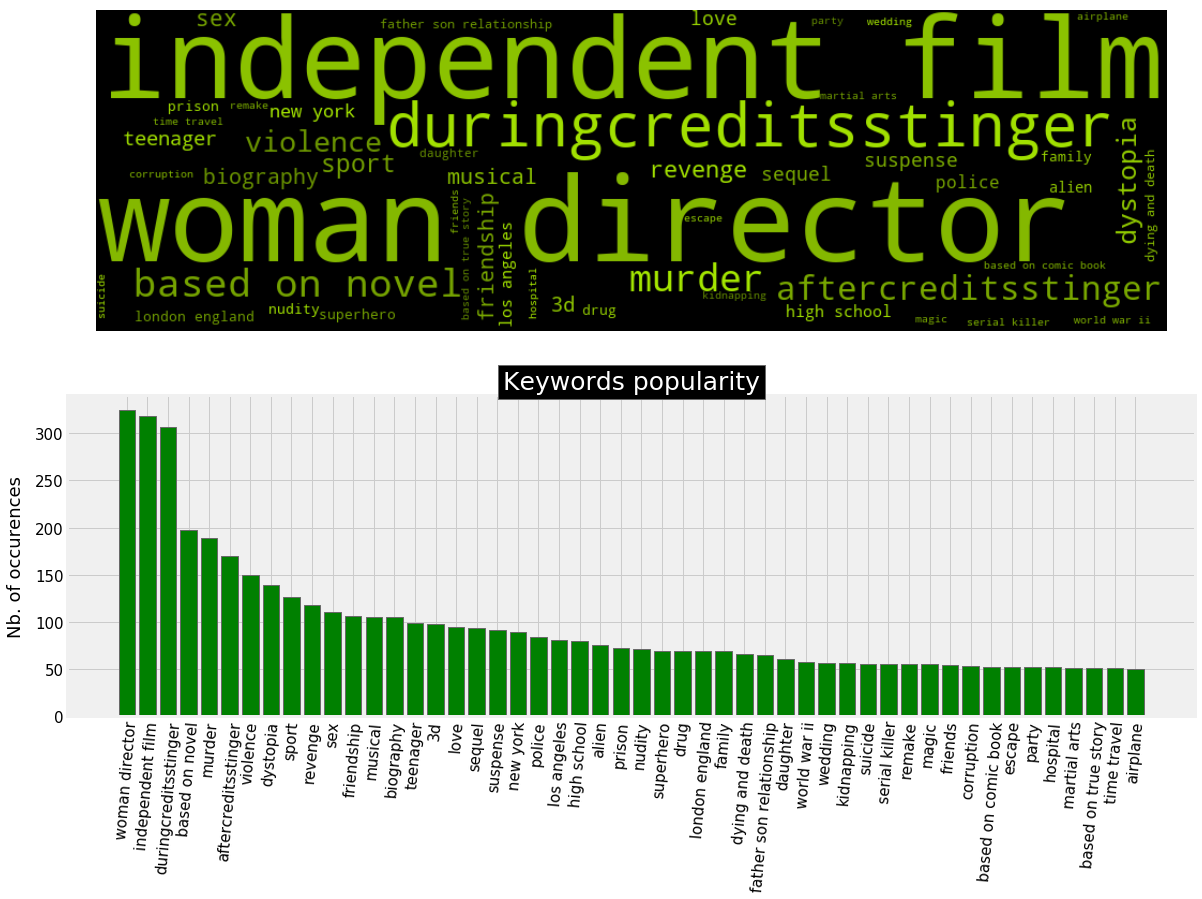

In [42]:
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)

words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 


wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')


ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='g')



plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()
#fig.savefig('wordcloud.png')



In [43]:
missing_df = Total_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (Total_df.shape[0] 
                                - missing_df['missing_count']) / Total_df.shape[0] * 100
missing_df.sort_values('filling_factor').reset_index(drop = True)

,column_name,missing_count,filling_factor
0,homepage,3091,35.644389
1,tagline,844,82.427649
2,country,174,96.377264
3,actor_3_name,93,98.063710
4,language,86,98.209452
5,actor_2_name,63,98.688320
6,actor_1_name,53,98.896523
7,director_name,30,99.375390
8,overview,3,99.937539
9,duration,2,99.958359


In [44]:
Total_df['decade'] = Total_df['title_year'].apply(lambda x:((x-1900)//10)*10)


def get_stats(gr):
    return {'min':gr.min(),'max':gr.max(),'count': gr.count(),'mean':gr.mean()}

test = Total_df['title_year'].groupby(Total_df['decade']).apply(get_stats).unstack()

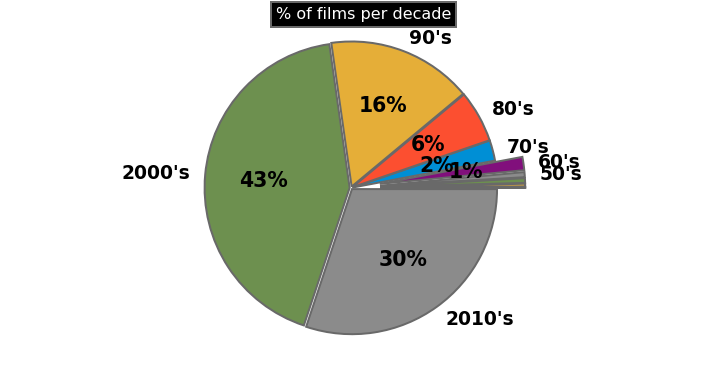

In [45]:
sns.set_context("poster", font_scale=0.85)

def label(s):
    val = (1900 + s, s)[s < 100]
    chaine = '' if s < 50 else "{}'s".format(int(val))
    return chaine

plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
labels = [label(s) for s in  test.index]
sizes  = test['count'].values
explode = [0.2 if sizes[i] < 100 else 0.01 for i in range(11)]
ax.pie(sizes, explode = explode, labels=labels,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
ax.set_title('% of films per decade',
             bbox={'facecolor':'k', 'pad':5},color='w', fontsize=16);
Total_df.drop('decade', axis=1, inplace = True)
#plt.savefig('films_per_decade.png')

In [46]:
genre_labels = set()
for s in Total_df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))


In [47]:
keyword_occurences, dum = count_word(Total_df, 'genres', genre_labels)
keyword_occurences[:10]

[['Drama', 2297],
 ['Comedy', 1722],
 ['Thriller', 1274],
 ['Action', 1154],
 ['Romance', 894],
 ['Adventure', 790],
 ['Crime', 696],
 ['Science Fiction', 535],
 ['Horror', 519],
 ['Family', 513]]

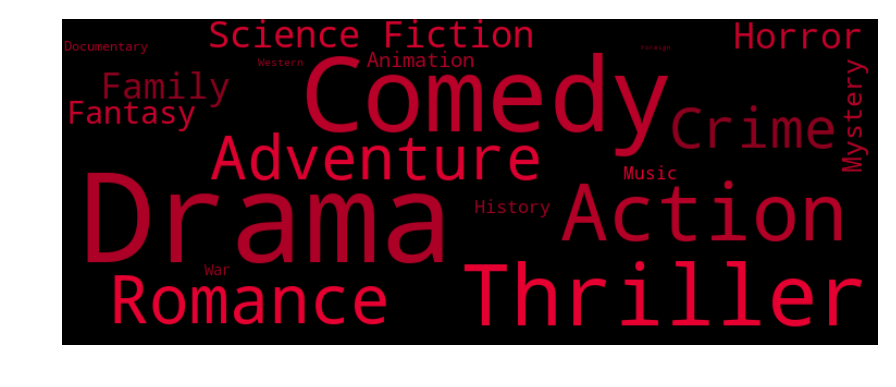

In [48]:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 501 
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=750,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
#plt.savefig('wordcloud_genres.png')

In [49]:
df_duplicate_cleaned = Total_df

In [50]:
def keywords_inventory(dataframe, colonne = 'plot_keywords'):
    PS = nltk.stem.PorterStemmer()
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys = []
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        for t in s.split('|'):
            t = t.lower() ; racine = PS.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
            else:
                keywords_roots[racine] = {t}
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Number of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select

In [51]:
keywords, keywords_roots, keywords_select = keywords_inventory(df_duplicate_cleaned,
                                                               colonne = 'plot_keywords')

Number of keywords in variable 'plot_keywords': 9474


In [52]:
icount = 0
for s in keywords_roots.keys():
    if len(keywords_roots[s]) > 1: 
        icount += 1
        if icount < 15: print(icount, keywords_roots[s], len(keywords_roots[s]))

1 {'nazis', 'nazi'} 2
2 {'record', 'recording'} 2
3 {'paganism', 'pagan'} 2
4 {'cheerleading', 'cheerleader'} 2
5 {'colonialism', 'colony'} 2
6 {'suspense', 'suspension'} 2
7 {'gnome', 'gnomes'} 2
8 {'freezing', 'freeze'} 2
9 {'dance', 'dancing'} 2
10 {'traveller', 'travel'} 2
11 {'whaling', 'whale'} 2
12 {'birding', 'bird'} 2
13 {'modeling', 'models', 'model'} 3
14 {'art', 'arts'} 2


In [53]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize 
PS = PorterStemmer()

In [54]:
def remplacement_df_keywords(df, dico_remplacement, roots = False):
    df_new = df.copy(deep = True)
    for index, row in df_new.iterrows():
        chaine = row['plot_keywords']
        if pd.isnull(chaine): continue
        nouvelle_liste = []
        for s in chaine.split('|'): 
            clef = PS.stem(s) if roots else s
            if clef in dico_remplacement.keys():
                nouvelle_liste.append(dico_remplacement[clef])
            else:
                nouvelle_liste.append(s)       
        df_new.set_value(index, 'plot_keywords', '|'.join(nouvelle_liste)) 
    return df_new

In [55]:
df_keywords_cleaned = remplacement_df_keywords(df_duplicate_cleaned, keywords_select,
                                               roots = True)

In [56]:
keywords.remove('')
keyword_occurences, keywords_count = count_word(df_keywords_cleaned,'plot_keywords',keywords)
keyword_occurences[:5]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['murder', 197],
 ['based on novel', 197]]

In [57]:
len(keyword_occurences)

9473

In [58]:
from nltk.corpus import wordnet

In [59]:
def get_synonymes(mot_cle):
    lemma = set()
    for ss in wordnet.synsets(mot_cle):
        for w in ss.lemma_names():
            #_______________________________
            # We just get the 'nouns':
            index = ss.name().find('.')+1
            if ss.name()[index] == 'n': lemma.add(w.lower().replace('_',' '))
    return lemma   

In [113]:
mot_cle = 'violence'
lemma = get_synonymes(mot_cle)
for s in lemma:
    print(' "{:<30}" in keywords list -> {} {}'.format(s, s in keywords,keywords_count[s] if s in keywords else 0 ))

 "furiousness                   " in keywords list -> False 0
 "fierceness                    " in keywords list -> False 0
 "violence                      " in keywords list -> True 150
 "ferocity                      " in keywords list -> False 0
 "fury                          " in keywords list -> False 0
 "wildness                      " in keywords list -> False 0
 "force                         " in keywords list -> False 0
 "vehemence                     " in keywords list -> False 0


In [61]:
def test_keyword(mot, key_count, threshold):
    return (False , True)[key_count.get(mot, 0) >= threshold]

In [63]:
keyword_occurences.sort(key = lambda x:x[1], reverse = False)
key_count = dict()
for s in keyword_occurences:
    key_count[s[0]] = s[1]

remplacement_mot = dict()
icount = 0
for index, [mot, nb_apparitions] in enumerate(keyword_occurences):
    if nb_apparitions > 5: continue  
    lemma = get_synonymes(mot)
    if len(lemma) == 0: continue     
    
    liste_mots = [(s, key_count[s]) for s in lemma 
                  if test_keyword(s, key_count, key_count[mot])]
    liste_mots.sort(key = lambda x:(x[1],x[0]), reverse = True)    
    if len(liste_mots) <= 1: continue       
    if mot == liste_mots[0][0]: continue    
    icount += 1
    if  icount < 8:
        print('{:<12} -> {:<12} (init: {})'.format(mot, liste_mots[0][0], liste_mots))    
    remplacement_mot[mot] = liste_mots[0][0]

print(90*'_'+'\n'+'The replacement concerns {}% of the keywords.'
      .format(round(len(remplacement_mot)/len(keywords)*100,2)))

valor        -> heroism      (init: [('heroism', 4), ('valor', 1)])
photo        -> photograph   (init: [('photograph', 16), ('photo', 1)])
kkk          -> ku klux klan (init: [('ku klux klan', 5), ('kkk', 1)])
rite         -> ritual       (init: [('ritual', 2), ('rite', 1)])
fondling     -> hugging      (init: [('hugging', 1), ('fondling', 1)])
columbia     -> columbia university (init: [('columbia university', 1), ('columbia', 1)])
siren        -> femme fatale (init: [('femme fatale', 6), ('siren', 1), ('enchantress', 1)])
__________________________________________________________________________________________
The replacement concerns 5.96% of the keywords.


In [64]:
print('Keywords that appear both in keys and values:'.upper()+'\n'+45*'-')
icount = 0
for s in remplacement_mot.values():
    if s in remplacement_mot.keys():
        icount += 1
        if icount < 10: print('{:<20} -> {:<20}'.format(s, remplacement_mot[s]))

for key, value in remplacement_mot.items():
    if value in remplacement_mot.keys():
        remplacement_mot[key] = remplacement_mot[value] 

KEYWORDS THAT APPEAR BOTH IN KEYS AND VALUES:
---------------------------------------------
tramp                -> hiking              
field                -> battlefield         
fatherhood           -> father              
principal            -> star                
coach                -> manager             
home                 -> family              
hit                  -> strike              
coach                -> manager             
principal            -> star                


In [65]:
df_keywords_synonyms = \
            remplacement_df_keywords(df_keywords_cleaned, remplacement_mot, roots = False)   
keywords, keywords_roots, keywords_select = \
            keywords_inventory(df_keywords_synonyms, colonne = 'plot_keywords')

Number of keywords in variable 'plot_keywords': 8910


In [66]:
keywords.remove('')
new_keyword_occurences, keywords_count = count_word(df_keywords_synonyms,
                                                    'plot_keywords',keywords)
new_keyword_occurences[:5]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['murder', 197],
 ['based on novel', 197]]

In [67]:
def remplacement_df_low_frequency_keywords(df, keyword_occurences):
    df_new = df.copy(deep = True)
    key_count = dict()
    for s in keyword_occurences: 
        key_count[s[0]] = s[1]    
    for index, row in df_new.iterrows():
        chaine = row['plot_keywords']
        if pd.isnull(chaine): continue
        nouvelle_liste = []
        for s in chaine.split('|'): 
            if key_count.get(s, 4) > 3: nouvelle_liste.append(s)
        df_new.set_value(index, 'plot_keywords', '|'.join(nouvelle_liste))
    return df_new

In [68]:
df_keywords_occurence =  remplacement_df_low_frequency_keywords(df_keywords_synonyms, new_keyword_occurences)
keywords, keywords_roots, keywords_select = keywords_inventory(df_keywords_occurence, colonne = 'plot_keywords')

Number of keywords in variable 'plot_keywords': 2121


In [69]:
keywords.remove('')
new_keyword_occurences, keywords_count = count_word(df_keywords_occurence,
                                                    'plot_keywords',keywords)
new_keyword_occurences[:5]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 197]]

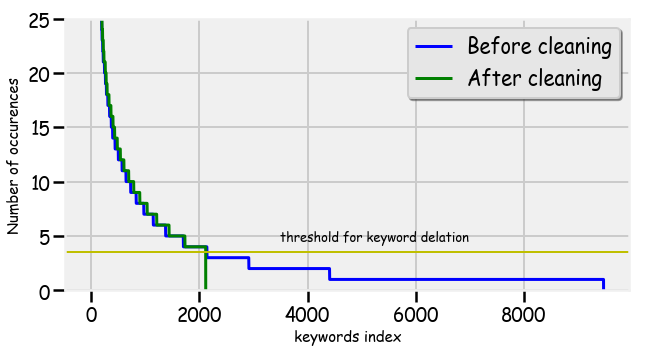

In [70]:
font = {'family' : 'fantasy', 'weight' : 'normal', 'size'   : 20}
mpl.rc('font', **font)

keyword_occurences.sort(key = lambda x:x[1], reverse = True)

y_axis = [i[1] for i in keyword_occurences]
x_axis = [k for k,i in enumerate(keyword_occurences)]

new_y_axis = [i[1] for i in new_keyword_occurences]
new_x_axis = [k for k,i in enumerate(new_keyword_occurences)]

f, ax = plt.subplots(figsize=(9, 5))
ax.plot(x_axis, y_axis, 'b', label='Before cleaning')
ax.plot(new_x_axis, new_y_axis, 'g', label='After cleaning')


legend = ax.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('.90')
for label in legend.get_texts():
    label.set_fontsize('medium')
            
plt.ylim((0,25))
plt.axhline(y=3.5, linewidth=2, color = 'Y')
plt.xlabel("keywords index", family='fantasy', fontsize = 15)
plt.ylabel("Number of occurences", family='fantasy', fontsize = 15)
#plt.suptitle("Nombre d'occurences des mots clés", fontsize = 18, family='fantasy')
plt.text(3500, 4.5, 'threshold for keyword delation', fontsize = 13)
plt.show()
#plt.savefig('graph_before&after_cleaning.png')

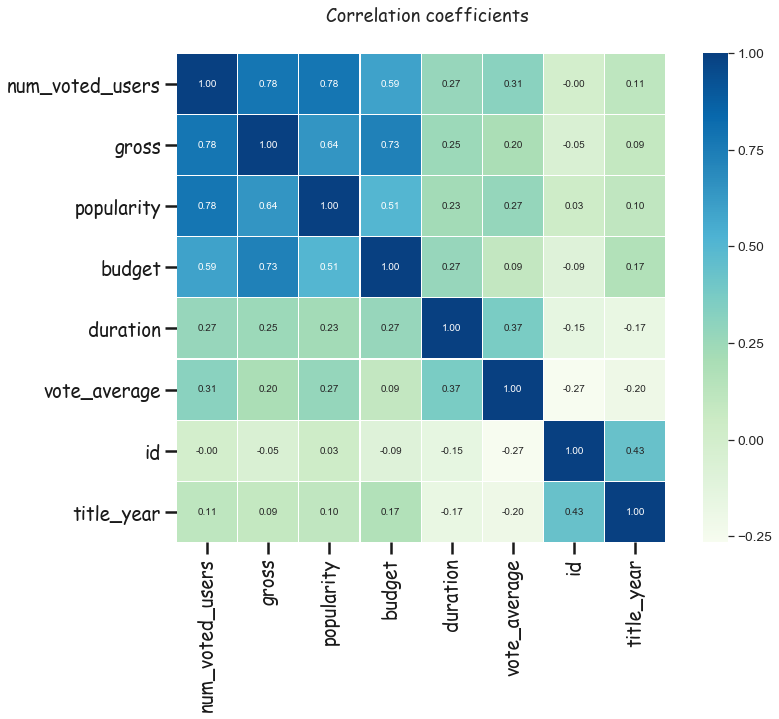

In [71]:
f, ax = plt.subplots(figsize=(12, 9))

corrmat = df_keywords_occurence.dropna(how='any').corr()

k = 17 
cols = corrmat.nlargest(k, 'num_voted_users')['num_voted_users'].index
cm = np.corrcoef(df_keywords_occurence[cols].dropna(how='any').values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, linewidth = 0.1, cmap = 'GnBu',
                 yticklabels=cols.values, xticklabels=cols.values)
f.text(0.5, 0.93, "Correlation coefficients", ha='center', fontsize = 18, family='fantasy')
plt.show()
#plt.savefig('correlation_coeff.png')

In [72]:
df_var_cleaned = df_keywords_occurence.copy(deep = True)

In [73]:
missing_df = df_var_cleaned.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (df_var_cleaned.shape[0] 
                                - missing_df['missing_count']) / df_var_cleaned.shape[0] * 100
missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)
missing_df

,column_name,missing_count,filling_factor
0,homepage,3091,35.644389
1,tagline,844,82.427649
2,country,174,96.377264
3,actor_3_name,93,98.063710
4,language,86,98.209452
5,actor_2_name,63,98.688320
6,actor_1_name,53,98.896523
7,director_name,30,99.375390
8,overview,3,99.937539
9,duration,2,99.958359


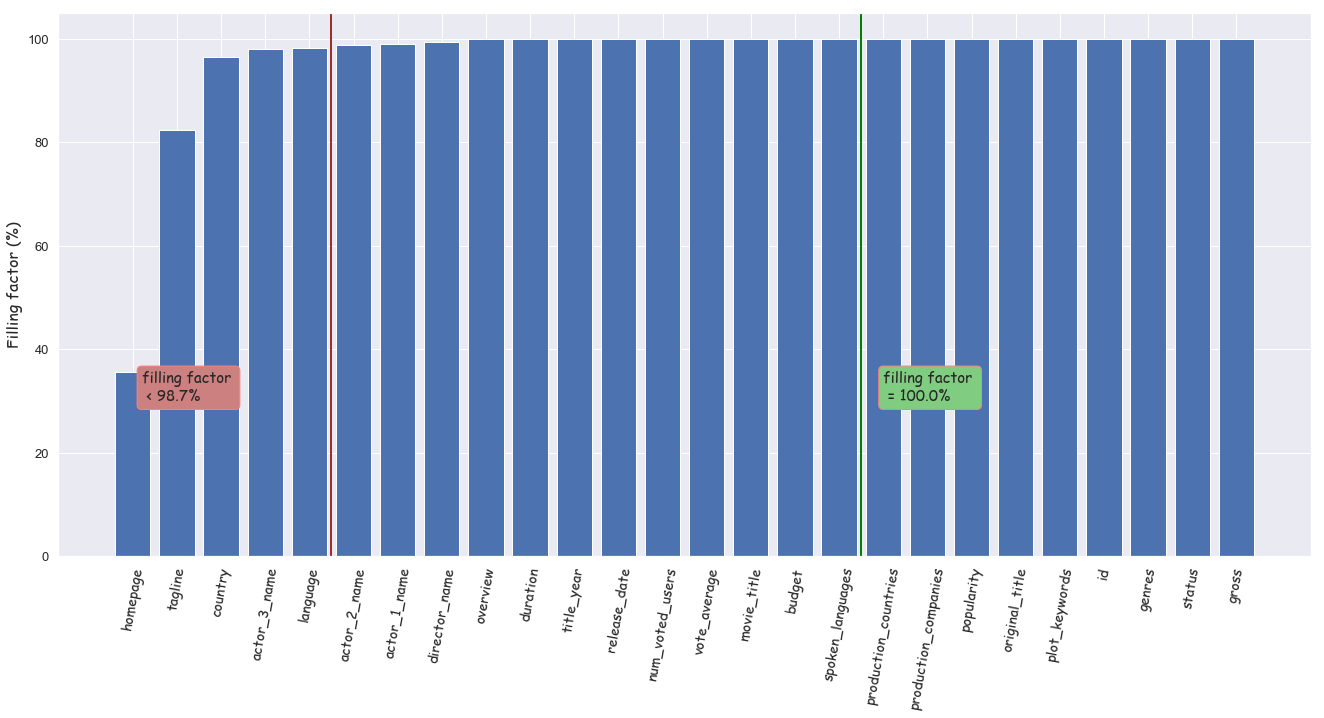

In [74]:
y_axis = missing_df['filling_factor'] 
x_label = missing_df['column_name']
x_axis = missing_df.index

fig = plt.figure(figsize=(20, 10))
plt.xticks(rotation=80, fontsize = 30)
plt.yticks(fontsize = 13)

N_thresh = 5
plt.axvline(x=N_thresh-0.5, linewidth=2, color = 'brown')
plt.text(N_thresh-4.8, 30, 'filling factor \n < {}%'.format(round(y_axis[N_thresh],1)),
         fontsize = 15, family = 'fantasy', bbox=dict(boxstyle="round",
                   ec=(1.0, 0.5, 0.5),
                   fc=(0.8, 0.5, 0.5)))
N_thresh = 17
plt.axvline(x=N_thresh-0.5, linewidth=2, color = 'green')
plt.text(N_thresh, 30, 'filling factor \n = {}%'.format(round(y_axis[N_thresh],1)),
         fontsize = 15, family = 'fantasy', bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(0.5, 0.8, 0.5)))

plt.xticks(x_axis, x_label,family='fantasy', fontsize = 14 )
plt.ylabel('Filling factor (%)', family='fantasy', fontsize = 16)
plt.bar(x_axis, y_axis);
plt.savefig('graph_for_missing_val.png')

In [75]:
df_filling = df_var_cleaned.copy(deep=True)
missing_year_info = df_filling[df_filling['title_year'].isnull()][[
            'director_name','actor_1_name', 'actor_2_name', 'actor_3_name']]
missing_year_info[:]

,director_name,actor_1_name,actor_2_name,actor_3_name
4553,NaN,NaN,NaN,NaN


In [76]:
df_filling.iloc[4553]

budget                                                                  0
genres                                                                   
homepage                                                              NaN
id                                                                 380097
plot_keywords                                                            
language                                                              NaN
original_title                                 America Is Still the Place
overview                1971 post civil rights San Francisco seemed li...
popularity                                                              0
production_companies                                                   []
production_countries                                                   []
release_date                                                          NaT
gross                                                                   0
duration                              

In [77]:
def fill_year(df):
    col = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']
    usual_year = [0 for _ in range(4)]
    var        = [0 for _ in range(4)]
   
    for i in range(4):
        usual_year[i] = df.groupby(col[i])['title_year'].mean()
   
    actor_year = dict()
    for i in range(4):
        for s in usual_year[i].index:
            if s in actor_year.keys():
                if pd.notnull(usual_year[i][s]) and pd.notnull(actor_year[s]):
                    actor_year[s] = (actor_year[s] + usual_year[i][s])/2
                elif pd.isnull(actor_year[s]):
                    actor_year[s] = usual_year[i][s]
            else:
                actor_year[s] = usual_year[i][s]
        
   
    missing_year_info = df[df['title_year'].isnull()]
   
    icount_replaced = 0
    for index, row in missing_year_info.iterrows():
        value = [ np.NaN for _ in range(4)]
        icount = 0 ; sum_year = 0
        for i in range(4):            
            var[i] = df.loc[index][col[i]]
            if pd.notnull(var[i]): value[i] = actor_year[var[i]]
            if pd.notnull(value[i]): icount += 1 ; sum_year += actor_year[var[i]]
        if icount != 0: sum_year = sum_year / icount 

        if int(sum_year) > 0:
            icount_replaced += 1
            df.set_value(index, 'title_year', int(sum_year))
            if icount_replaced < 10: 
                print("{:<45} -> {:<20}".format(df.loc[index]['movie_title'],int(sum_year)))
    return 

In [78]:
fill_year(df_filling)

In [79]:
icount = 0
for index, row in df_filling[df_filling['plot_keywords'].isnull()].iterrows():
    icount += 1
    liste_mot = row['movie_title'].strip().split()
    new_keyword = []
    for s in liste_mot:
        lemma = get_synonymes(s)
        for t in list(lemma):
            if t in keywords: 
                new_keyword.append(t)                
    if new_keyword and icount < 15: 
        print('{:<50} -> {:<30}'.format(row['movie_title'], str(new_keyword)))
    if new_keyword:
        df_filling.set_value(index, 'plot_keywords', '|'.join(new_keyword)) 

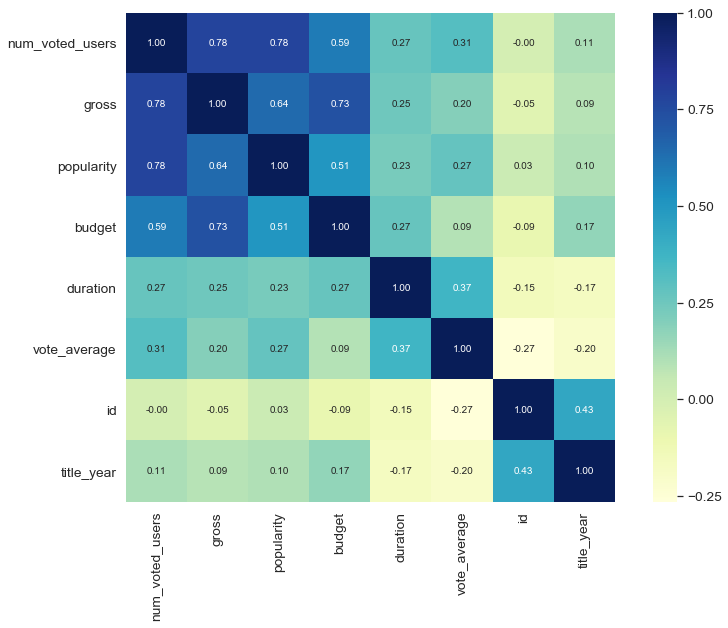

In [80]:
f, ax = plt.subplots(figsize=(12, 9))
cols = corrmat.nlargest(9, 'num_voted_users')['num_voted_users'].index
cm = np.corrcoef(df_keywords_occurence[cols].dropna(how='any').values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f',cmap = 'YlGnBu', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#plt.savefig('correcoeff2.png')

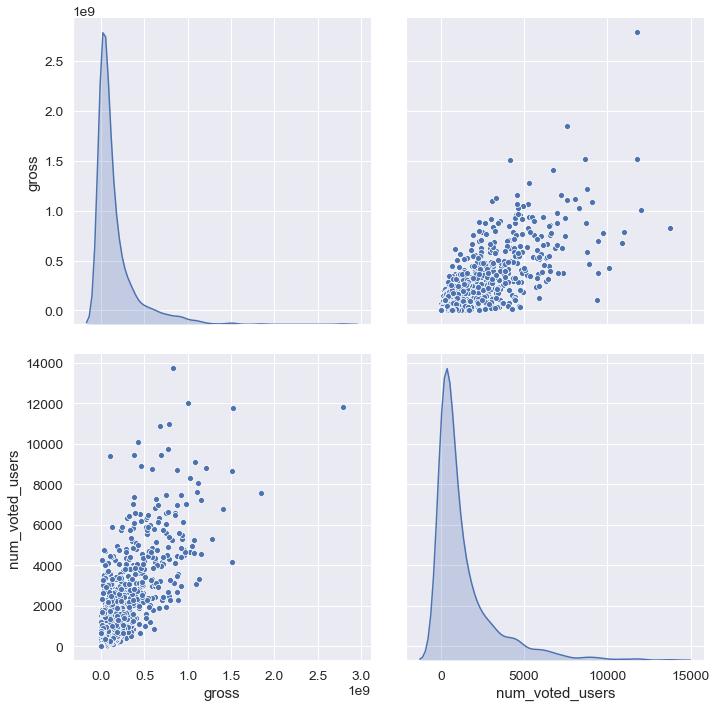

In [81]:
#f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
cols = ['gross', 'num_voted_users']
sns.pairplot(df_filling.dropna(how='any')[cols],diag_kind='kde', size = 5)
plt.show();
#plt.savefig('subplots.png')

In [82]:
from sklearn import linear_model

In [83]:

def variable_linreg_imputation(df, col_to_predict, ref_col):
    regr = linear_model.LinearRegression()
    test = df[[col_to_predict,ref_col]].dropna(how='any', axis = 0)
    X = np.array(test[ref_col])
    Y = np.array(test[col_to_predict])
    X = X.reshape(len(X),1)
    Y = Y.reshape(len(Y),1)
    regr.fit(X, Y)
    
    test = df[df[col_to_predict].isnull() & df[ref_col].notnull()]
    for index, row in test.iterrows():
        value = float(regr.predict(row[ref_col]))
        df.set_value(index, col_to_predict, value)

In [84]:
variable_linreg_imputation(df_filling, 'gross', 'num_voted_users')

In [85]:
df = df_filling.copy(deep = True)
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (df.shape[0] 
                                - missing_df['missing_count']) / df.shape[0] * 100
missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)


In [86]:
missing_df

,column_name,missing_count,filling_factor
0,homepage,3091,35.644389
1,tagline,844,82.427649
2,country,174,96.377264
3,actor_3_name,93,98.063710
4,language,86,98.209452
5,actor_2_name,63,98.688320
6,actor_1_name,53,98.896523
7,director_name,30,99.375390
8,overview,3,99.937539
9,duration,2,99.958359


In [87]:
df = df_filling.copy(deep=True)
df.reset_index(inplace = True, drop = True)

In [88]:
df.head()

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,production_countries,release_date,gross,duration,spoken_languages,status,tagline,movie_title,vote_average,num_voted_users,title_year,country,actor_1_name,actor_2_name,actor_3_name,director_name
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space colony|society|spac...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'id': 289, 'name': 'Ingenious Film Partners'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,United States of America,Zoe Saldana,Sigourney Weaver,Stephen Lang,James Cameron
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'id': 2, 'name': 'Walt Disney Pictures'}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0,United States of America,Orlando Bloom,Keira Knightley,Stellan Skarsgård,Gore Verbinski
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|british...,Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'id': 5, 'name': 'Columbia Pictures'}, {'id'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0,United Kingdom,Christoph Waltz,Léa Seydoux,Ralph Fiennes,Sam Mendes
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'id': 923, 'name': 'Legendary Pictures'}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0,United States of America,Michael Caine,Gary Oldman,Anne Hathaway,Christopher Nolan
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'id': 2, 'name': 'Walt Disney Pictures'}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0,United States of America,Lynn Collins,Samantha Morton,Willem Dafoe,Andrew Stanton


In [89]:
gaussian_filter = lambda x,y,sigma: math.exp(-(x-y)**2/(2*sigma**2))

In [90]:
def entry_variables(df, id_entry): 
    col_labels = []    
    if pd.notnull(df['director_name'].iloc[id_entry]):
        for s in df['director_name'].iloc[id_entry].split('|'):
            col_labels.append(s)
            
    for i in range(3):
        column = 'actor_NUM_name'.replace('NUM', str(i+1))
        if pd.notnull(df[column].iloc[id_entry]):
            for s in df[column].iloc[id_entry].split('|'):
                col_labels.append(s)
                
    if pd.notnull(df['plot_keywords'].iloc[id_entry]):
        for s in df['plot_keywords'].iloc[id_entry].split('|'):
            col_labels.append(s)
    return col_labels

In [91]:
def add_variables(df, REF_VAR):    
    for s in REF_VAR: df[s] = pd.Series([0 for _ in range(len(df))])
    colonnes = ['genres', 'actor_1_name', 'actor_2_name',
                'actor_3_name', 'director_name', 'plot_keywords']
    for categorie in colonnes:
        for index, row in df.iterrows():
            if pd.isnull(row[categorie]): continue
            for s in row[categorie].split('|'):
                if s in REF_VAR: df.set_value(index, s, 1)            
    return df

In [92]:
from sklearn.neighbors import NearestNeighbors

In [93]:
def recommand(df, id_entry):    
    df_copy = df.copy(deep = True)    
    liste_genres = set()
    for s in df['genres'].str.split('|').values:
        liste_genres = liste_genres.union(set(s))    
   
    variables = entry_variables(df_copy, id_entry)
    variables += list(liste_genres)
    df_new = add_variables(df_copy, variables)
    
    X = df_new.as_matrix(variables)
    nbrs = NearestNeighbors(n_neighbors=31, algorithm='auto', metric='euclidean').fit(X)

    distances, indices = nbrs.kneighbors(X)    
    xtest = df_new.iloc[id_entry].as_matrix(variables)
    xtest = xtest.reshape(1, -1)

    distances, indices = nbrs.kneighbors(xtest)

    return indices[0][:]

In [94]:
def extract_parameters(df, liste_films):     
    parametres_films = ['_' for _ in range(31)]
    i = 0
    max_users = -1
    for index in liste_films:
        parametres_films[i] = list(df.iloc[index][['movie_title', 'title_year',
                                        'imdb_score', 'num_user_for_reviews', 
                                        'num_voted_users']])
        parametres_films[i].append(index)
        max_users = max(max_users, parametres_films[i][4] )
        i += 1
        
    title_main = parametres_films[0][0]
    annee_ref  = parametres_films[0][1]
    parametres_films.sort(key = lambda x:critere_selection(title_main, max_users,
                                    annee_ref, x[0], x[1], x[2], x[4]), reverse = True)

    return parametres_films 

In [96]:
from fuzzywuzzy import fuzz

In [97]:
def sequel(titre_1, titre_2):    
    if fuzz.ratio(titre_1, titre_2) > 50 or fuzz.token_set_ratio(titre_1, titre_2) > 50:
        return True
    else:
        return False

In [98]:
def critere_selection(title_main, max_users, annee_ref, titre, annee, imdb_score, votes):    
    if pd.notnull(annee_ref):
        facteur_1 = gaussian_filter(annee_ref, annee, 20)
    else:
        facteur_1 = 1        

    sigma = max_users * 1.0

    if pd.notnull(votes):
        facteur_2 = gaussian_filter(votes, max_users, sigma)
    else:
        facteur_2 = 0
        
    if sequel(title_main, titre):
        note = 0
    else:
        note = imdb_score**2 * facteur_1 * facteur_2
    
    return note

In [99]:
def add_to_selection(film_selection, parametres_films):    
    film_list = film_selection[:]
    icount = len(film_list)    
    for i in range(31):
        already_in_list = False
        for s in film_selection:
            if s[0] == parametres_films[i][0]: already_in_list = True
            if sequel(parametres_films[i][0], s[0]): already_in_list = True            
        if already_in_list: continue
        icount += 1
        if icount <= 5:
            film_list.append(parametres_films[i])
    return film_list

In [100]:
def remove_sequels(film_selection):    
    removed_from_selection = []
    for i, film_1 in enumerate(film_selection):
        for j, film_2 in enumerate(film_selection):
            if j <= i: continue 
            if sequel(film_1[0], film_2[0]): 
                last_film = film_2[0] if film_1[1] < film_2[1] else film_1[0]
                removed_from_selection.append(last_film)

    film_list = [film for film in film_selection if film[0] not in removed_from_selection]

    return film_list 

In [101]:
def find_similarities(df, id_entry, del_sequels = True, verbose = False):    
    if verbose: 
        print(90*'_' + '\n' + "QUERY: films similar to id={} -> '{}'".format(id_entry,
                                df.iloc[id_entry]['movie_title']))
    
    liste_films = recommand(df, id_entry)
   
    
    parametres_films = extract_parameters(df, liste_films)
    
    film_selection = []
    film_selection = add_to_selection(film_selection, parametres_films)
    
    if del_sequels: film_selection = remove_sequels(film_selection)
   
    film_selection = add_to_selection(film_selection, parametres_films)
    
    selection_titres = []
    for i,s in enumerate(film_selection):
        selection_titres.append([s[0].replace(u'\xa0', u''), s[5]])
        if verbose: print("nº{:<2}     -> {:<30}".format(i+1, s[0]))

    return selection_titres
    #print(film_selection)
    #return film_selection

In [102]:
def Movie_Rec(name,del_sequels=True,verbose=True):
    id_entry = df[df['movie_title']==str(name)].index.values.astype(int)[0]
    dum = find_similarities(df, id_entry, del_sequels=True, verbose = False)
    rec_movies=pd.DataFrame(dum,columns=['movie_title','Index'])
    rec_movies.drop(['Index'],axis=1,inplace=True)
    #rec_movies=pd.merge(rec_movies, df, on='movie_title', how='left')
    #rec_movies=rec_movies[['movie_title','genres','homepage','release_date','director_name']]
    
    return rec_movies
        
        
       
    
    
    
    

In [103]:
md = pd.read_csv('movies_metadata.csv')

In [104]:
rec=Movie_Rec("Avatar",del_sequels=True, verbose= True )

In [105]:
rec

,movie_title
0,Avatar
1,Star Trek Into Darkness
2,Jupiter Ascending
3,The Fifth Element
4,Pirates of the Caribbean: On Stranger Tides


In [106]:
rec=pd.merge(rec, md, on='movie_title', how='left')


In [107]:
rec = rec[['movie_title', 'poster_path']]

In [108]:
rec

,movie_title,poster_path
0,Avatar,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg
1,Star Trek Into Darkness,/41mhrXASAW3sdn7LBWF49uCX0xi.jpg
2,Jupiter Ascending,/aMEsvTUklw0uZ3gk3Q6lAj6302a.jpg
3,The Fifth Element,/zaFa1NRZEnFgRTv5OVXkNIZO78O.jpg
4,Pirates of the Caribbean: On Stranger Tides,/wNUDAq5OUMOtxMlz64YaCp7gZma.jpg


In [109]:
rec=pd.merge(rec, df, on='movie_title', how='left')
rec=rec[['movie_title','poster_path','language','genres','director_name','release_date']]

In [110]:
from IPython.display import Image, HTML

In [111]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
rec['poster_path'] = "<img src='" + base_poster_url + rec['poster_path'] + "' style='height:100px;'>"

In [112]:
pd.set_option('display.max_colwidth', 500)
HTML(rec.to_html(escape=False))

,movie_title,poster_path,language,genres,director_name,release_date
0,Avatar,,English,Action|Adventure|Fantasy|Science Fiction,James Cameron,2009-12-10
1,Star Trek Into Darkness,,English,Action|Adventure|Science Fiction,J.J. Abrams,2013-05-05
2,Jupiter Ascending,,English,Science Fiction|Fantasy|Action|Adventure,Lilly Wachowski,2015-02-04
3,The Fifth Element,,English,Adventure|Fantasy|Action|Thriller|Science Fiction,Luc Besson,1997-05-07
4,Pirates of the Caribbean: On Stranger Tides,,English,Adventure|Action|Fantasy,Rob Marshall,2011-05-14
